In [37]:
import numpy as np
from sklearn.datasets import load_digits

# Cargar datos
data = load_digits()
X_all = data.data       # (1797, 64)
y_all = data.target     # (1797,)

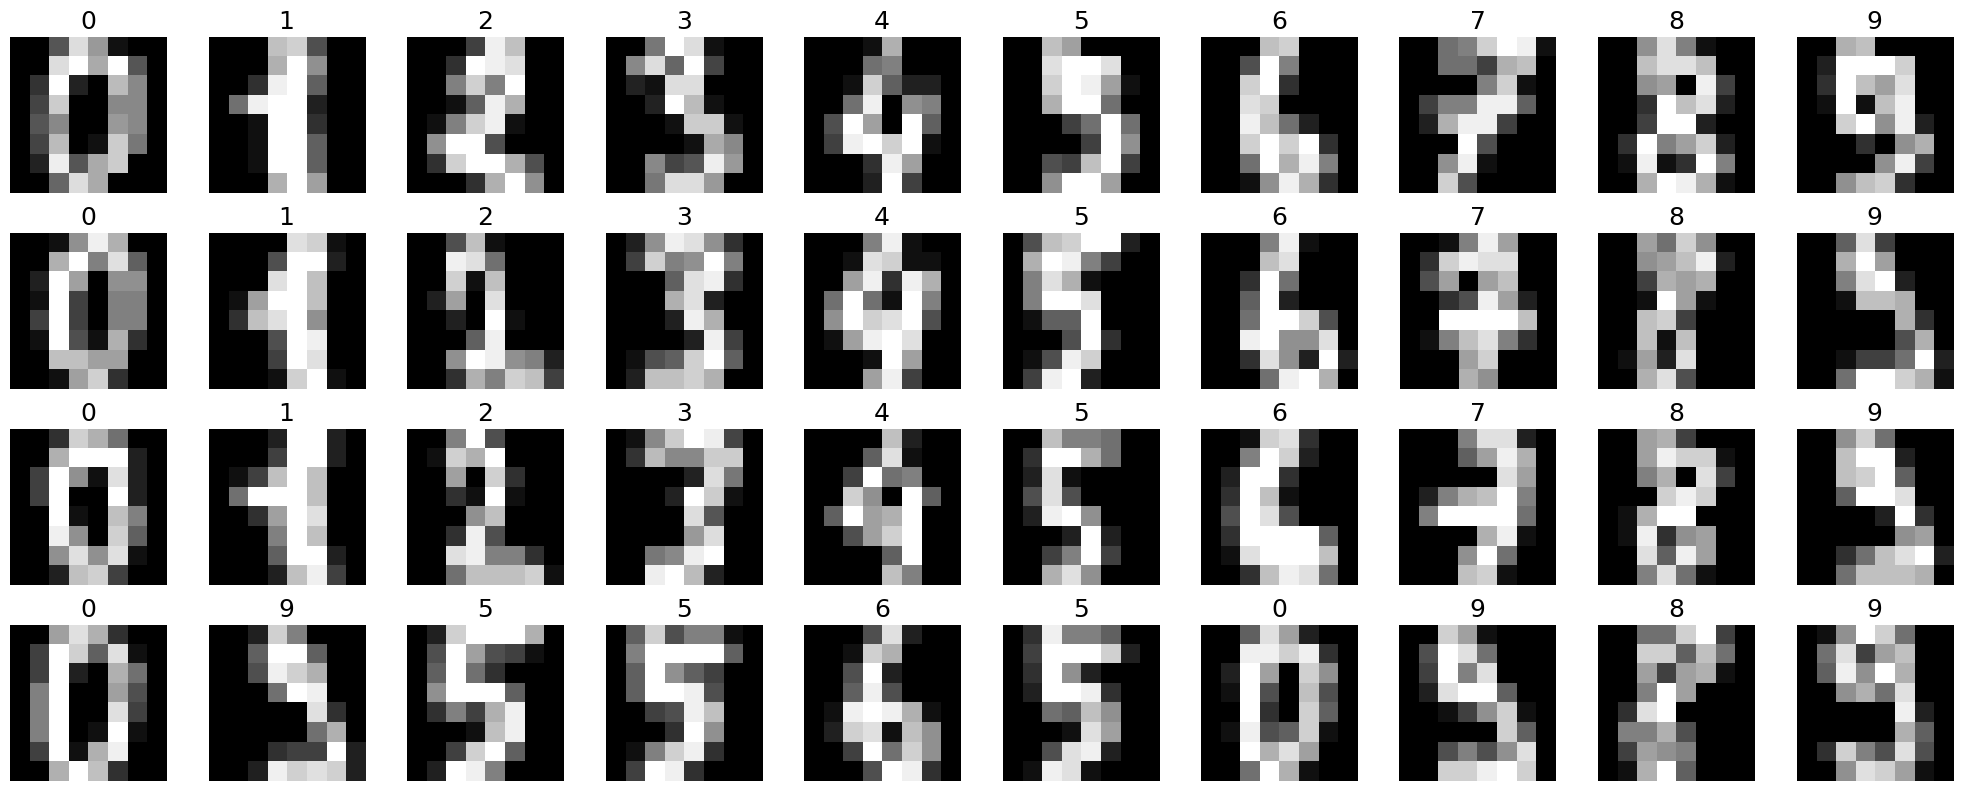

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_all[i].reshape(8, 8), cmap='gray')
    plt.title(str(y_all[i]), fontsize=18)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [39]:
print("X shape: ", X_all.shape)
print("y shape: ", y_all.shape)

X shape:  (1797, 64)
y shape:  (1797,)


In [40]:
# Definición de la función para colocar datos en la forma correcta
def preparar_datos(X_all, y_all):
    X_all = X_all.T

    print(X_all.shape)


    print()


    print(y_all)

    y_all = np.eye(10)[y_all]

    print(y_all)

    print(y_all.shape)
    y_all = y_all.T
    print(y_all.shape)

    return X_all, y_all

X_all, y_all = preparar_datos(X_all, y_all)

(64, 1797)

[0 1 2 ... 8 9 8]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
(1797, 10)
(10, 1797)


In [41]:
# Definición de la función para hacer split en los datos
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    m = X.shape[1]
    indices = np.arange(m)
    np.random.shuffle(indices)
    
    test_count = int(m * test_size)
    
    test_idx = indices[:test_count]
    train_idx = indices[test_count:]
    
    X_train = X[:, train_idx]
    X_test = X[:, test_idx]
    
    y_train = y[:, train_idx]
    y_test = y[:, test_idx]
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all)

print(X_train.shape, X_test.shape)  
print(y_train.shape, y_test.shape) 

(64, 1438) (64, 359)
(10, 1438) (10, 359)


In [42]:
# Función para iniciar los parámetros 
def iniciar_parametros():

    w1 = np.random.randn(20,64) * np.sqrt(1 / 10)
    b1 = np.random.randn(20,1) * np.sqrt(1 / 10)
    w2 = np.random.randn(10,20) * np.sqrt(1 / 10)
    b2 = np.random.randn(10,1) * np.sqrt(1 / 10)

    return w1, b1, w2, b2

w1, b1, w2, b2 = iniciar_parametros()

In [43]:
# Definir la función ReLU y su derivada
def relu(x):
    return np.maximum(0, x)

def derivada_relu(x):
    return (x > 0)

In [44]:
# Definir la función softmax
def softmax(Z):
    Z_exp = np.exp(Z - np.max(Z, axis=0, keepdims=True)) # Se resta el máximo para evitar overflow
    return Z_exp / np.sum(Z_exp, axis=0, keepdims=True)

In [45]:
# Definir la función para propagar hacia adelante 
def forward_propagation(X, w1, b1, w2, b2):

    a0 = X

    z1 = w1 @ a0 + b1
    a1 = relu(z1)

    z2 = w2 @ a1 + b2
    a2 = softmax(z2)

    return a0, a1, a2, z1


a0, a1, a2, z1 = forward_propagation(X_train, w1, b1, w2, b2)

In [46]:
# Función para deshacer el one-hot
def deshacer_onehot(y):
    y_labels = np.argmax(y, axis=0)
    return y_labels

print(a2.shape)
print(deshacer_onehot(a2))

(10, 1438)
[2 5 5 ... 2 2 2]


In [47]:
# Función pérdida
def loss(A, y):
    m = y.shape[1]
    loss = -np.sum(y * np.log(A + 1e-8)) / m
    return loss

print(loss(a2, y_train))

14.239526000600788


In [48]:
# Definición de la función para hacer backward propagation
def backward_prop(y, a2, a1, a0, z1, w1, b1, w2, b2, learning_rate = 0.01):

    m = y.shape[1]

    dz2 = a2 - y

    dw2 = (dz2 @ a1.T) / m
    db2 = (np.sum(dz2, axis=1, keepdims=True)) / m

    dz1 = (w2.T @ dz2) * derivada_relu(z1)

    dw1 = (dz1 @ a0.T) / m
    db1 = (np.sum(dz1, axis=1, keepdims=True)) / m


    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    return w1, b1, w2, b2

w1, b1, w2, b2 = backward_prop(y_train, a2, a1, a0, z1, w1, b1, w2, b2)
    

In [49]:
# Función para obtener el error con cualquier conjunto de datos
def evaluar(w1, b1, w2, b2, X, y):
    a0, a1, a2, z1 = forward_propagation(X, w1, b1, w2, b2)
    return float(loss(a2, y))

evaluar(w1, b1, w2, b2, X_test, y_test)

11.385381295647225

In [50]:
# Función para ver el porcentaje de acierto 
def precision(pred, y):
    return np.sum(pred == y) / y.size

float(precision(deshacer_onehot(a2), deshacer_onehot(y_train)))

0.12795549374130738

In [51]:
# Definición de la función para hacer el descenso de gradiente
def descenso_gradiente(X, y, iteraciones, learning_rate):
    w1, b1, w2, b2 = iniciar_parametros()

    for i in range(iteraciones):
        a0, a1, a2, z1 = forward_propagation(X_train, w1, b1, w2, b2)

        w1, b1, w2, b2 = backward_prop(y_train, a2, a1, a0, z1, w1, b1, w2, b2, learning_rate)

        if (i % 50 == 0):
            print("Iteracion: ", i)
            print("Error: ", evaluar(w1, b1, w2, b2, X, y))
            print("Precision: ", precision(deshacer_onehot(a2), deshacer_onehot(y)))
            print()
    
    return w1, b1, w2, b2

In [109]:
w1, b1, w2, b2 = descenso_gradiente(X_train, y_train, 2000, 0.05)

Iteracion:  0
Error:  10.186882507115374
Precision:  0.10639777468706536

Iteracion:  50
Error:  0.6339697840476074
Precision:  0.7962447844228094

Iteracion:  100
Error:  0.3514441329760205
Precision:  0.8936022253129347

Iteracion:  150
Error:  0.24044158581345804
Precision:  0.9179415855354659

Iteracion:  200
Error:  0.17813427374913546
Precision:  0.9464534075104312

Iteracion:  250
Error:  0.14096900160232254
Precision:  0.9541029207232267

Iteracion:  300
Error:  0.11613167854638991
Precision:  0.9631432545201669

Iteracion:  350
Error:  0.09835179266783155
Precision:  0.9714881780250347

Iteracion:  400
Error:  0.08483848509997152
Precision:  0.9742698191933241

Iteracion:  450
Error:  0.07492143321456118
Precision:  0.9770514603616134

Iteracion:  500
Error:  0.06706707202719052
Precision:  0.978442280945758

Iteracion:  550
Error:  0.06071843579863156
Precision:  0.9819193324061196

Iteracion:  600
Error:  0.0550870059028233
Precision:  0.9847009735744089

Iteracion:  650
Err

In [110]:
error_test = evaluar(w1, b1, w2, b2, X_test, y_test)
error_train = evaluar(w1, b1, w2, b2, X_train, y_train)

print("Error con los datos de testeo:        ", error_test)
print("Error con los datos de entrenamiento: ", error_train)

Error con los datos de testeo:         0.4115961606625532
Error con los datos de entrenamiento:  0.010642224689151035


In [111]:
xx, xx, a2, xx = forward_propagation(X_test, w1, b1, w2, b2)
precision_test = precision(deshacer_onehot(a2), deshacer_onehot(y_test))

xx, xx, a2, xx = forward_propagation(X_train, w1, b1, w2, b2)
precision_train = precision(deshacer_onehot(a2), deshacer_onehot(y_train))

print("Precisión con los datos de testeo:        ", precision_test)
print("Precisión con los datos de entrenamiento: ", precision_train)

Precisión con los datos de testeo:         0.9331476323119777
Precisión con los datos de entrenamiento:  0.9993045897079277


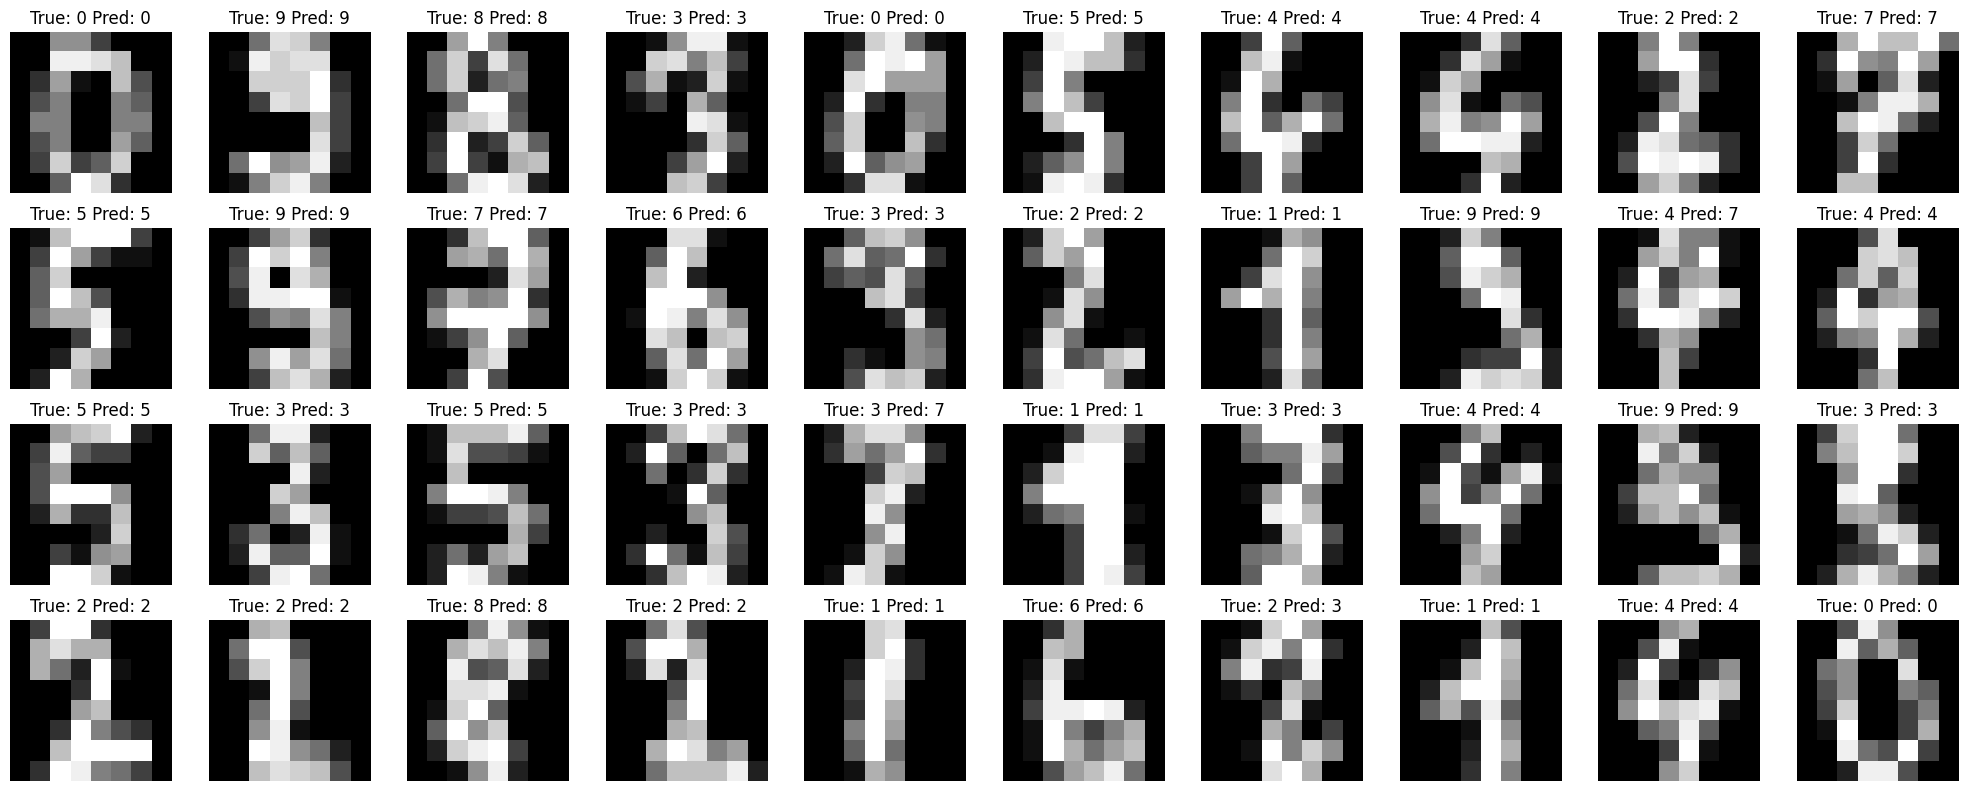

In [112]:
import matplotlib.pyplot as plt


xx, xx, a2, xx = forward_propagation(X_test, w1, b1, w2, b2)


y_test_labels = deshacer_onehot(y_test)
y_test_pred_labels = deshacer_onehot(a2)

plt.figure(figsize=(20, 8))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X_test[:, i].reshape(8, 8), cmap='gray') 
    plt.title(f"True: {y_test_labels[i]} Pred: {y_test_pred_labels[i]}", fontsize=12) 
    plt.axis('off')

plt.tight_layout()
plt.show()

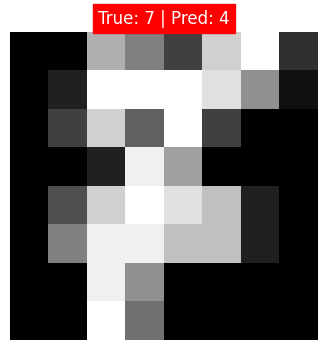

In [108]:
xx, xx, a2, xx = forward_propagation(X_test, w1, b1, w2, b2)

y_test_labels = deshacer_onehot(y_test)
y_test_pred_labels = deshacer_onehot(a2)

i = np.random.randint(0, X_test.shape[1])

plt.figure(figsize=(4, 4))
plt.imshow(X_test[:, i].reshape(8, 8), cmap='gray')
plt.axis('off')

plt.title(
    f"True: {y_test_labels[i]} | Pred: {y_test_pred_labels[i]}",
    fontsize=12,
    color="white",
    backgroundcolor="red"
)

plt.show()